[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hxtreme\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



DATASET :

AFTER DROPPING UNWANTED COLUMNS FROM THE DATASET :

MISSING VALUES IN EACH COLUMN :
user_location      46218
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
text                   0
hashtags           27041
retweets               0
favorites              0
is_retweet             0
dtype: int64

AFTER REPLACING THE MISSING COLUMNS INTO A SINGLE CATEGORY :
user_location      0
user_followers     0
user_friends       0
user_favourites    0
user_verified      0
text               0
hashtags           0
retweets           0
favorites          0
is_retweet         0
dtype: int64

THE CORRELATION MATRIX :
                 user_followers  user_friends  user_favourites  user_verified  \
user_followers         1.000000     -0.003203        -0.031180       0.363375   
user_friends          -0.003203      1.000000         0.174074      -0.002809   
user_favourites       -0.031180      0.174074         1.000000      -0.059330   
user_v

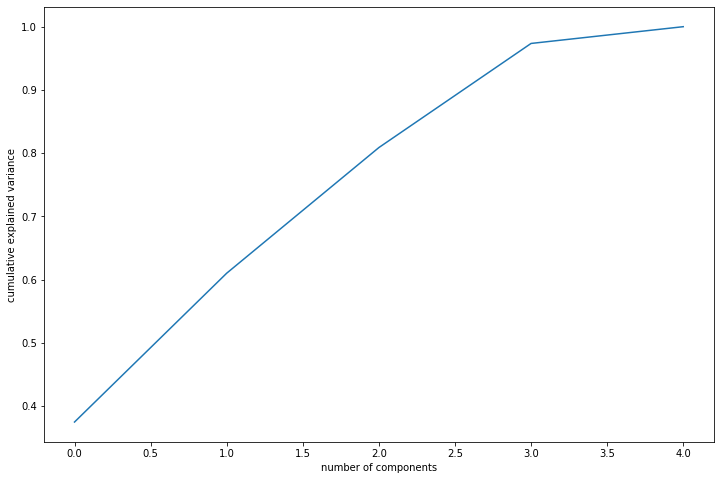

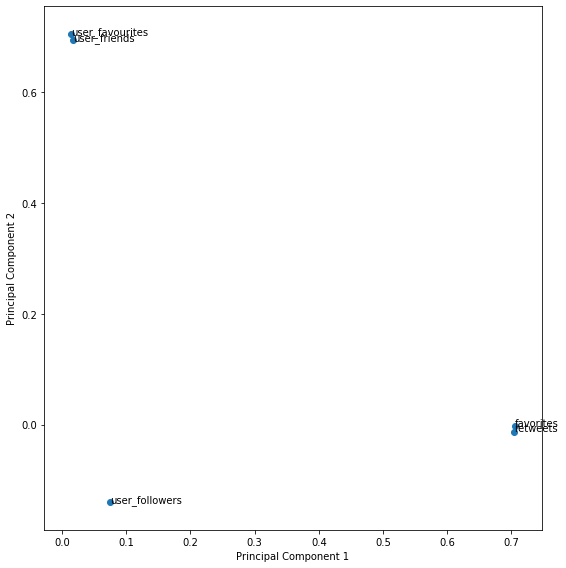

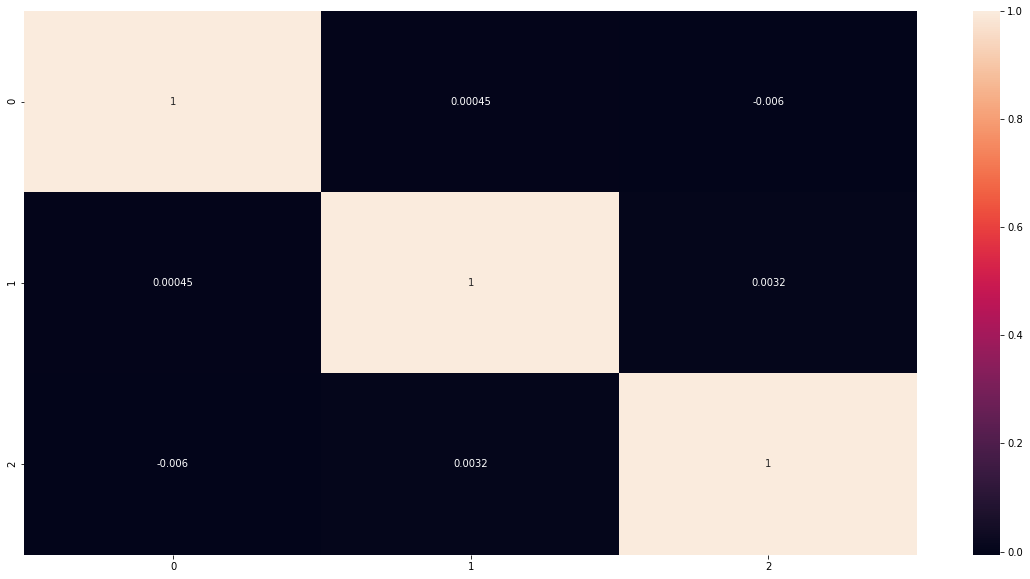

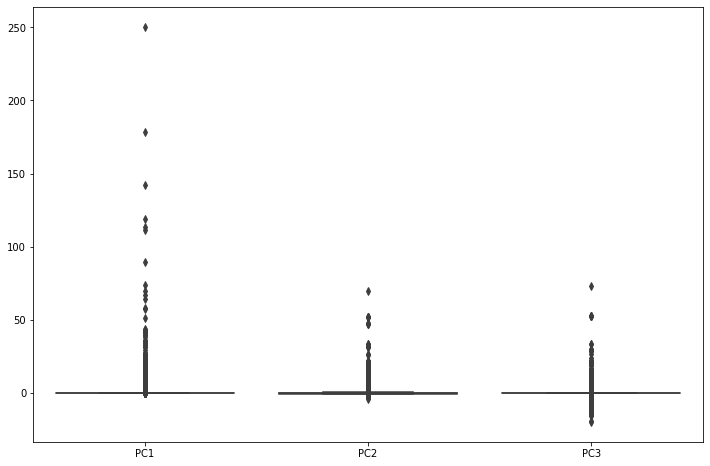

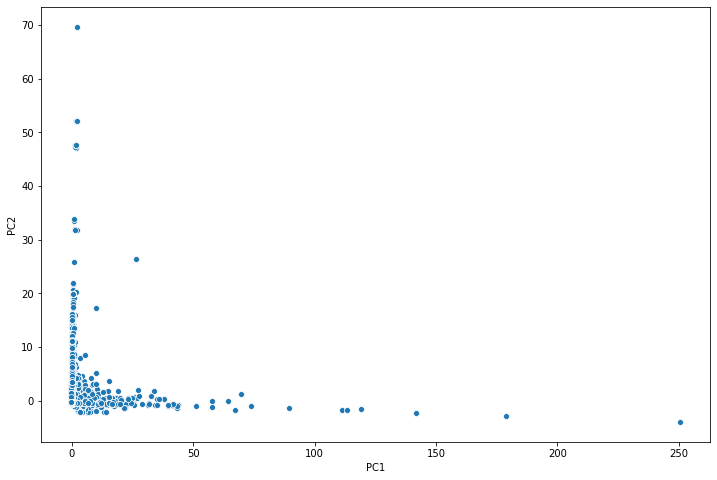


VADER ANALYSIS :
THE BAR CHART
THE PIE CHART


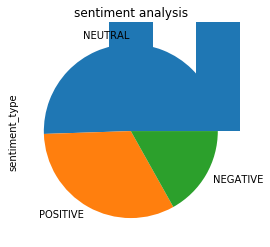

In [1]:
#Libraries needed
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import scale

# To perform PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#For Vader Analysis 
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

#Importing dataset as data
data = pd.read_csv("C:/Users/Hxtreme/Documents/projects/vaccination_all_tweets.csv")
print("\nDATASET :")
data.head()

#Data cleaning

#dropping unwanted columns
to_drop = ['user_name', 'user_description', 'user_created', 'date', 'source']
data.drop(to_drop, inplace=True, axis=1)
print("\nAFTER DROPPING UNWANTED COLUMNS FROM THE DATASET :")
data.head()

#making the twitter id as the index
data = data.set_index('id')

#missing values percent per column
print("\nMISSING VALUES IN EACH COLUMN :")
print(data.isnull().sum())

#since user_location and hashtags are text columns, we replace those missing values with "Unknown place" and "no hashtag" for better and accurate visualizations.
data["user_location"]=data["user_location"].fillna("Unkown place")
data["hashtags"]=data["hashtags"].fillna("No hashtag")

#ensuring there is no missing values
print("\nAFTER REPLACING THE MISSING COLUMNS INTO A SINGLE CATEGORY :")
print(data.isnull().sum())

#the correlation matrix
print("\nTHE CORRELATION MATRIX :")
print(data.corr())
print("\nTHE CORRELATION HEATMAP :")
sns.heatmap(data.corr(),cmap="BrBG",annot=True)

#EDA - Explaratory Data Analysis
#numerical vs. numerical
print("\nEXPLORATORY DATA ANALYSIS :")
data.plot.scatter(x="user_followers", y="user_friends", color="green")
data.plot.scatter(x="user_followers", y="user_favourites", color="blue")
data.plot.scatter(x="user_followers", y="retweets", color="red")
data.plot.scatter(x="user_followers", y="favorites", color="yellow")
data.plot.scatter(x="user_friends", y="user_favourites", color="black")
data.plot.scatter(x="user_friends", y="retweets", color="brown")
data.plot.scatter(x="user_friends", y="favorites", color="green")
data.plot.scatter(x="user_favourites", y="retweets", color="blue")
data.plot.scatter(x="user_favourites", y="favorites", color="red")
data.plot.scatter(x="retweets", y="favorites", color="yellow")

#categorical vs. numerical and categorical vs. categorical graphs could not be plotted sinnce there are more than 20,000 distinct values in each of these columns.

#pca is performed only on the numerical valued columns to give more sense to the interpretation.
data1=data.drop('user_location',1)
data1=data1.drop('hashtags',1)
data1=data1.drop('user_verified',1)
data1=data1.drop('text',1)
data1=data1.drop('is_retweet',1)
standard_scaler = StandardScaler()
data_scaled = standard_scaler.fit_transform(data1)
pca = PCA(svd_solver='randomized', random_state=42)
# fiting PCA on the dataset
print("\nPCA - PRINCIPAL COMPONENT ANALYSIS :")
pca.fit(data_scaled)
pca.components_
pca.explained_variance_ratio_

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

colnames = list(data1.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df

%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)
df_pca = pca_final.fit_transform(data_scaled)
df_pca.shape

pc = np.transpose(df_pca)
corrmat = np.corrcoef(pc)
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pcs_df2)
plt.show()
pcs_df2.shape
pcs_df2.head()

fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()

#vader analysis
print("\nVADER ANALYSIS :")
df=data.drop('user_location',1)
df=data.drop('user_followers',1)
df=data.drop('user_favourites',1)
df=data.drop('user_friends',1)
df=data.drop('user_verified',1)
df=data.drop('hashtags',1)
df=data.drop('favorites',1)
df=data.drop('retweets',1)
df=data.drop('is_retweet',1)
df.head()

df['scores'] = df['text'].apply(lambda text: sid.polarity_scores(text))
df.head()
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'
print("THE BAR CHART")
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")
print("THE PIE CHART")
df.sentiment_type.value_counts().plot(kind='pie',title="sentiment analysis")

THE PIE CHART


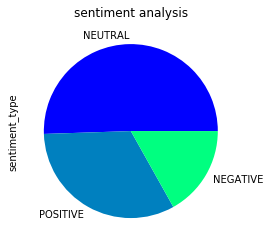

In [2]:
print("THE PIE CHART")
df.sentiment_type.value_counts().plot(kind='pie',title="sentiment analysis", colormap = "winter")

In [3]:
data.shape

(145025, 10)